In [32]:
#importing all the packages required for the project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)


pd.options.mode.chained_assignment = None


In [33]:
df=pd.read_csv("movies.csv")

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [20]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [36]:
df.shape

(7668, 15)

In [37]:
#2. Data Cleaning
#To find missing values
for c in df.columns:
    pct_null = np.mean(df[c].isnull()) * 100
    count_null = df[c].isnull().sum()
    print('{} - {} - {}%'.format(c, count_null, pct_null))

name - 0 - 0.0%
rating - 77 - 1.004173187271779%
genre - 0 - 0.0%
year - 0 - 0.0%
released - 2 - 0.02608242044861763%
score - 3 - 0.03912363067292645%
votes - 3 - 0.03912363067292645%
director - 0 - 0.0%
writer - 3 - 0.03912363067292645%
star - 1 - 0.013041210224308816%
country - 3 - 0.03912363067292645%
budget - 2171 - 28.31246739697444%
gross - 189 - 2.464788732394366%
company - 17 - 0.2217005738132499%
runtime - 4 - 0.05216484089723526%


In [40]:
#To check missing values for each variable.As only 2 movie release name is missing , will check on that first.
df[df['released'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [43]:
df.loc[df['name'].isin(pd.Series(['Saw: The Final Chapter'])),'released']='October 29, 2010 (United States)'
df.loc[df['name'].isin(pd.Series(['The Wolfman'])),'released']='February 12, 2010 (United States)'
print('Null values in released:', str(df['released'].isnull().sum()))

Null values in released: 0


In [45]:
#To check the data if it contains any duplicates
df.drop_duplicates()
print('Total number of rows after removing duplicates:',str(len(df)))

No of rows after removing duplicates: 7668


In [46]:
df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0


In [49]:
# Checking values for release year wheather it matches the year in release date column in all instance.
df['year_check'] = np.where((df['released'].str.split(', ').str[-1].astype(str).str[:4] == df['year'].astype(str)), True, False)
print(df['year_check'].value_counts())
print(df[['name', 'year', 'released','year_check']][~df['year_check']][:20])

True     6323
False    1345
Name: year_check, dtype: int64
                                 name  year  \
8                         Superman II  1980   
11             The Gods Must Be Crazy  1980   
21                      Heaven's Gate  1980   
33   Cattle Annie and Little Britches  1980   
40           The Watcher in the Woods  1980   
49                 Lion of the Desert  1980   
54                      City of Women  1980   
59                          Hangar 18  1980   
62                       It's My Turn  1980   
78                            Babylon  1980   
79                         Windwalker  1980   
86              La Cage aux Folles II  1980   
91                Mantis Fist Fighter  1980   
96                      The Evil Dead  1981   
97                            Porky's  1981   
101                         Mad Max 2  1981   
102                          Das Boot  1981   
104                        Possession  1981   
116                    On Golden Pond  1981   
1

In [53]:
#To fix year issue,create new column and print first 10 reows of the result
df['release_year'] = df['released'].str.replace('\D+', '').str[-4:].astype('int64')
print(df[['name', 'released', 'release_year']][:10])

                                             name  \
0                                     The Shining   
1                                 The Blue Lagoon   
2  Star Wars: Episode V - The Empire Strikes Back   
3                                       Airplane!   
4                                      Caddyshack   
5                                 Friday the 13th   
6                              The Blues Brothers   
7                                     Raging Bull   
8                                     Superman II   
9                                 The Long Riders   

                            released  release_year  
0      June 13, 1980 (United States)          1980  
1       July 2, 1980 (United States)          1980  
2      June 20, 1980 (United States)          1980  
3       July 2, 1980 (United States)          1980  
4      July 25, 1980 (United States)          1980  
5        May 9, 1980 (United States)          1980  
6      June 20, 1980 (United States)         

C:\Users\Vasantha\AppData\Local\Temp/ipykernel_2704/670831624.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['release_year'] = df['released'].str.replace('\D+', '').str[-4:].astype('int64')


In [54]:
#Generate Summary statistics for future numeric columns to explore data further and clean unexpected patterns
print('Mean values:')
print(df[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].mean())

print('\nMinimum values:')
print(df[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].min())

print('\nMaximum values:')
print(df[['release_year', 'score', 'votes', 'budget', 'gross', 'runtime']].max())

Mean values:
release_year    2.000626e+03
score           6.390411e+00
votes           8.810850e+04
budget          3.558988e+07
gross           7.850054e+07
runtime         1.072616e+02
dtype: float64

Minimum values:
release_year    1980.0
score              1.9
votes              7.0
budget          3000.0
gross            309.0
runtime           55.0
dtype: float64

Maximum values:
release_year    2.020000e+03
score           9.300000e+00
votes           2.400000e+06
budget          3.560000e+08
gross           2.847246e+09
runtime         3.660000e+02
dtype: float64


In [56]:
#based on the results the data between 1980-2020,
#Score range-> 1-10
#Avg film time-> 107
#longest runtime-> 366 mins
#checking for which film generated this value,as well as the other films with highest duration
print(df[['name','year','runtime']].sort_values(by=['runtime'],ascending=False)[:5])

                            name  year  runtime
4396           The Best of Youth  2003    366.0
1218               Little Dorrit  1987    357.0
2280                  Gettysburg  1993    271.0
2888                      Hamlet  1996    242.0
1868  The Beautiful Troublemaker  1991    238.0


In [57]:
#Check column with string values
print('rating')
print(np.sort(pd.unique(df['rating'].astype(str).values)))
print('\ngenre')
print(np.sort(pd.unique(df['genre'].astype(str).values)))
print('\ndirector')
print(np.sort(pd.unique(df['director'].astype(str).values)))
print('\ncountry')
print(np.sort(pd.unique(df['country'].astype(str).values)))
print('\ncompany')
print(np.sort(pd.unique(df['company'].astype(str).values))[:20])
print(np.sort(pd.unique(df['company'].astype(str).values))[-20:])


rating
['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA'
 'TV-PG' 'Unrated' 'X' 'nan']

genre
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'Western']

director
['A.R. Murugadoss' 'Aamir Khan' 'Aaron Blaise' ... 'Élie Chouraqui'
 'Éric Rohmer' 'Éva Gárdos']

country
['Argentina' 'Aruba' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'
 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark'
 'Federal Republic of Yugoslavia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Kenya' 'Lebanon' 'Libya' 'Malta'
 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Panama' 'Philippines'
 'Poland' 'Portugal' 'Republic of Macedonia' 'Romania' 'Russia' 'Serbia'
 'South Africa' 'South Korea' 'Soviet Union' 'Spain' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Turk

In [58]:
#Data looks clean in ost of the case. However, there is inconsistency in rating column.The film which is not rated the same is an unrated film.
#will do some classifivations with that
df.loc[df['rating'].astype(str).str.contains('Not Rated'), 'rating'] = 'Unrated'
print('rating')
print(np.sort(pd.unique(df['rating'].astype(str).values)))

rating
['Approved' 'G' 'NC-17' 'PG' 'PG-13' 'R' 'TV-14' 'TV-MA' 'TV-PG' 'Unrated'
 'X' 'nan']


In [59]:
#Almost all the data looks clean and will proceed with analysis

[Text(0.5, 1.0, 'Correlation Matrix')]

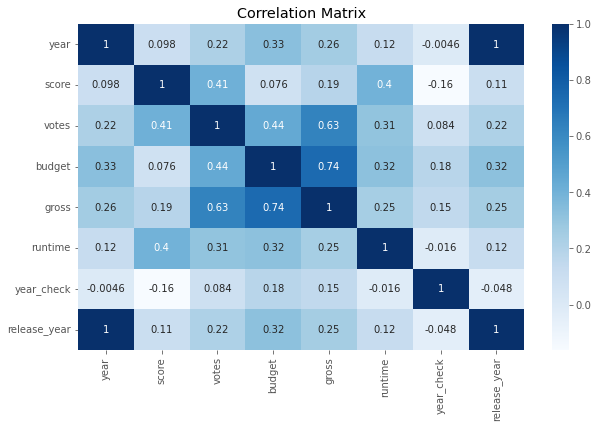

In [62]:
#To check which variables have highest correlatins with films ,gross.The starting hypothesis is that films
#with a high budget and a high score tend to have a higher gross.
#To check weather this assumption is correct ,will generate correlatin matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='Blues').set(title='Correlation Matrix')

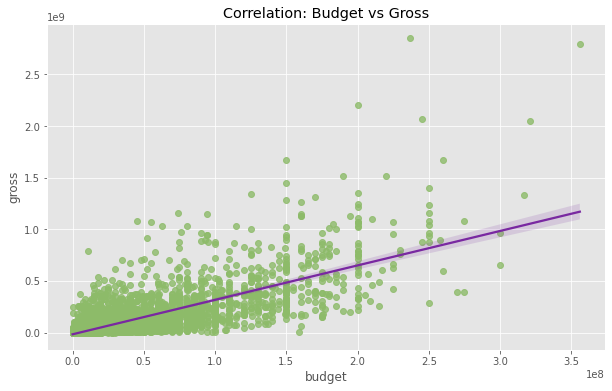

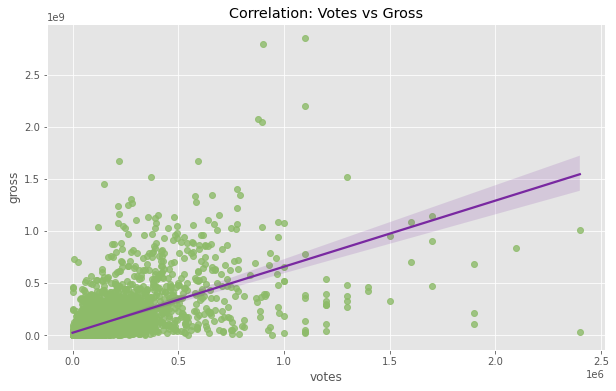

In [64]:
#Budget and votes have the strongest positive correlation with gross (0.74 and 0.63, respectively). This relationship is understandable: for a project to be successful, it is expected that the revenue the project generates is enough to cover the money invested in the project, and generate profit.
# High grossing films have a larger audience, which will result in more people reviewing the film, hence higher votes. Based on the data, the film's success is rarely indicative of its quality based on score, 
#however this is also affected by the number of people voting. As lower grossing films have fewer votes, the sample size is smaller, which can lead to biased scores.

#We can visualise the relationships using scatter plots

sns.regplot(data=df, x='budget', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Budget vs Gross')
plt.show()

sns.regplot(data=df, x='votes', y='gross', scatter_kws={"color": "#8dbb69"}, line_kws={"color": "#7928a1"}).set(title='Correlation: Votes vs Gross')
plt.show()

In [ ]:
#The scatter plots further confirm the positive relationship between gross and the two variables, however it is evident that there are outliers in the data, 
#which affects the Pearson correlation coefficient, making it not the most reliable method to analyse this data. It is beyond the scope of this project, but to gain a more comprehensive understanding,
#using other methods of analysis is recommended.

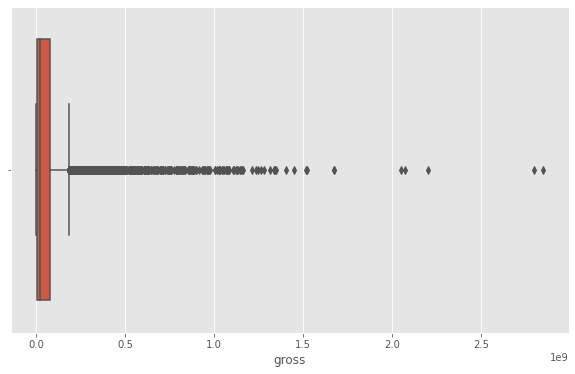

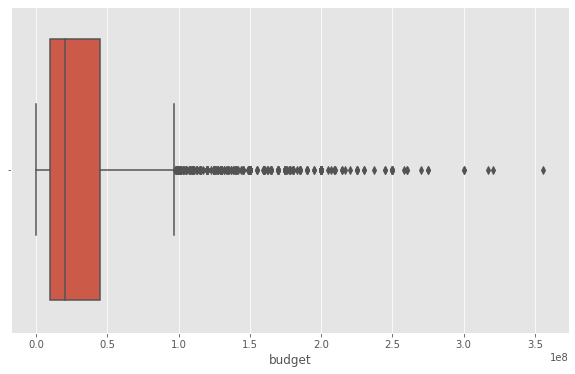

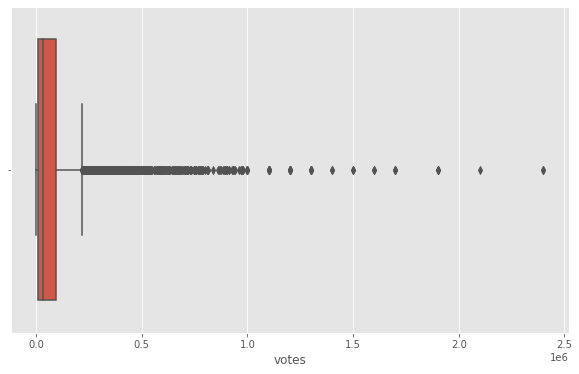

In [65]:
##We can use a box plot to see the outliers more clearly.
sns.boxplot(x=df['gross'])
plt.show()
sns.boxplot(x=df["budget"])
plt.show()
sns.boxplot(x=df["votes"])
plt.show()

In [ ]:
#Next, it will be interesting to look at trends over time. We will look whether there were any changes in budget, gross, and scores between 1980-2020. which is the time period that this dataset covers.

#We start by aggregating the data and grouping it by release_year.

In [66]:
df_aggregated = df.groupby(df['release_year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})

df_aggregated.head() # Check that the data was aggregated correctly

,budget,gross,score,name
,sum,sum,mean,count
release_year,,,,
1980,4.117500e+08,2.329467e+09,6.265000,80
1981,7.216000e+08,2.253569e+09,6.231068,103
1982,8.722850e+08,3.440553e+09,6.292187,128
1983,9.006106e+08,2.707176e+09,6.080000,145
1984,1.137476e+09,3.631932e+09,6.150955,157


In [67]:
#Next, we plot the time series data of total budget and gross per year on a line chart to visualise the trend.

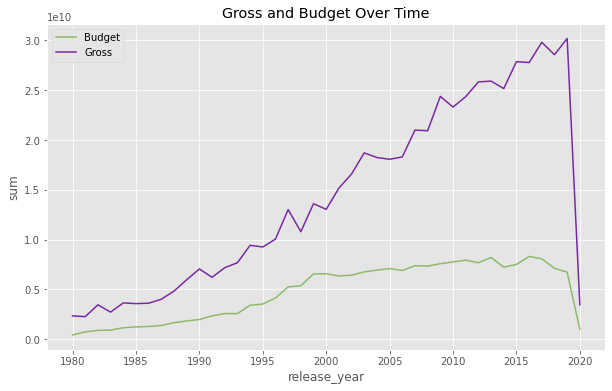

In [68]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['budget']['sum'], color='#8dbb69')
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['gross']['sum'], color="#7928a1")
plt.title('Gross and Budget Over Time')
plt.legend(labels=["Budget","Gross"])
plt.show()

In [69]:
#Since gross can be significantly higher than budget, especially in the latter years, the actual change in the budget can be difficult to see. We can adjust the scale by using logarithmic values of the variables.

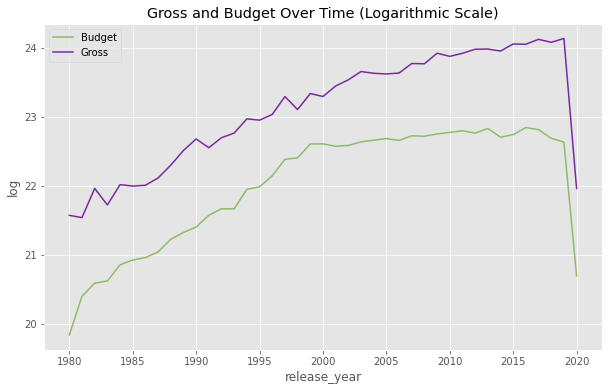

In [70]:
log_budget = np.log(df_aggregated['budget']['sum'])
log_gross = np.log(df_aggregated['gross']['sum'])

sns.lineplot(data=df_aggregated, x='release_year', y=log_budget, color='#8dbb69')
sns.lineplot(data=df_aggregated, x='release_year', y=log_gross, color="#7928a1")
plt.ylabel('log')
plt.legend(labels=["Budget","Gross"])
plt.title('Gross and Budget Over Time (Logarithmic Scale)')
plt.show()

In [ ]:
#The graph above illustrates that the film industry experienced consistent growth for the most part, however it faced a sharp decline in both the budget and the gross in 2020. This was likely related to the COVID-19 pandemic, which saw fewer films being made and cinemas being closed or only allowing 50% of the audience to prevent the spread of the virus.

#In fact, we can check the total number of films released each year by plotting it on a line chart, too

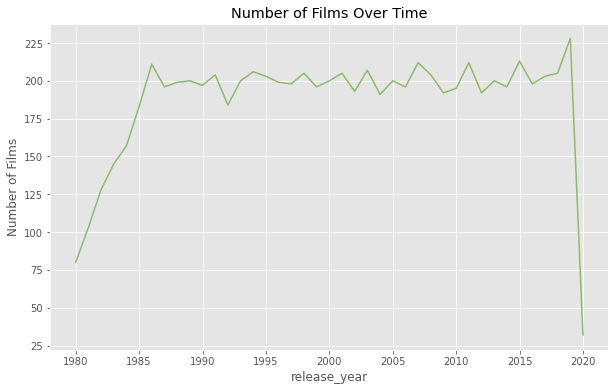

In [71]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['name']['count'], color='#8dbb69')
plt.ylabel('Number of Films')
plt.title('Number of Films Over Time')
plt.show()

In [72]:
#Indeed, there was a sharp decline in the number of films released in 2020.

#Next, we will see if the quality of films increased over time, using the average score each year as the measurement.

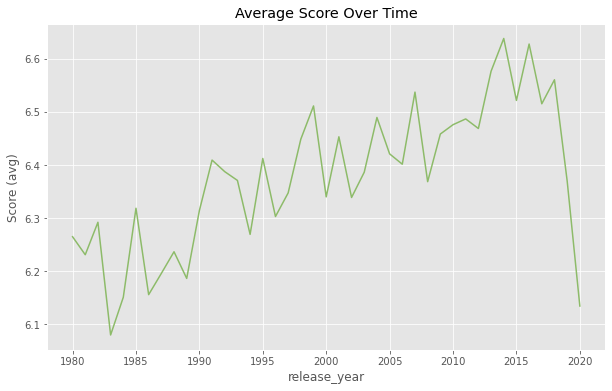

In [73]:
sns.lineplot(data=df_aggregated, x='release_year', y=df_aggregated['score']['mean'], color='#8dbb69')
plt.ylabel('Score (avg)')
plt.title('Average Score Over Time')
plt.show()

In [74]:
#There is much more fluctuation on this graph, although the overall trend was positive until a steep decline in 2020. So, not only were there fewer films released during the first year of the pandemic, but their quality (or at least the viewers' satisfaction) was lower on average.
#The data of the subsquent years will be interesting to see when it becomes available. 
#Time will tell how long it will take for the film industry to recover and reach the pre-covid numbers.
#With overall costs rising across the board, it might be a difficult journey as the costs of film production likely increased, and the spending habits have changed.